# take-home final exam

name : Morgan Schalizki

Note: this is an "open book" exam. You are free to use your notes, homework solutions, and all of the material uploaded to Canvas including Videos. You are not allowed to seek outside help (that includes searching the internet, other literature, or contacting anybody except the instructor).

The following you have seen before:

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

In [214]:

class TreeNode(object):
    def __init__(self, data, left_child = None, right_child = None):
        self.data = data
        self.left = left_child
        self.right =right_child
    
    def traverse_infix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_infix(result)
            
        result.append(self.data)
        
        if self.right:
            self.right.traverse_infix(result)
            
        return result

In [215]:
# create a graphical representation of a binary tree (plot_tree uses plot_node)
def plot_node(node, level = 1, posx = 0, posy = 0):
    
    width = 2200.0 * (0.5**(level))
    plt.text(posx, posy, str(node.data), horizontalalignment='center',fontsize=9)
    
    
    if node.left:
        px = [posx, posx-width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')
        plot_node(node.left, level+1, posx-width, posy-20)
    
    if node.right:
        plot_node(node.right, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')

def plot_tree(node, figsize=(10,6)):
    plt.style.use('dark_background')
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node)
    plt.show()


## A Binary Search Tree

In [246]:
class BST(object):
    def __init__(self):
        self.tree = None
    
    def _find_node(self, node, obj):
        if node == None:
            return None
        if node.data == obj:
            return node
        if obj < node.data:
            return self._find_node(node.left, obj)
        else: # so obj > node.data
            return self._find_node(node.right, obj)
    
    def is_element(self, obj):
        """ Returns true if obj is contained in the BST """
        node = self._find_node(self.tree, obj)
        return node != None

    def _insert(self, node, obj):
        if obj < node.data:
            if node.left:
                self._insert(node.left, obj)
            else:
                node.left = TreeNode(obj)
        elif obj > node.data:
            if node.right:
                self._insert(node.right, obj)
            else:
                node.right = TreeNode(obj)
        # do nothing if equal
    
    def insert(self, obj):
        """ insert a new obj into the BST """
        if self.tree == None:
            self.tree = TreeNode(obj)
        else:
            self._insert(self.tree, obj)
        
    def _replace_child(self, parent, old, new):
        """ Replace old by new, which can be the left or right child of parent """
        if parent==None:
            self.tree = new
        elif parent.left == old:
            parent.left = new
        elif parent.right == old:
            parent.right = new
        else:
            assert(False)
    
    def _delete_node(self, parent, node, obj):
        if node == None:
            return
        if obj < node.data:
            # traverse left
            self._delete_node(node,node.left, obj)
        elif obj > node.data:
            # traverse right
            self._delete_node(node,node.right, obj)
        elif node.data == obj:
            if node.left == None:
                # no left child, so replace node by its right child
                self._replace_child(parent, node, node.right)
            elif node.right == None:
                # no right child, so replace node by its left child
                self._replace_child(parent, node, node.left)
            else: # node has two children:
                replacement = node.left  
                parent = None
                while replacement != None:
                    if replacement.right == None:
                        break
                    parent = replacement
                    replacement = replacement.right
                data = replacement.data
                node.data = data

                self._replace_child(parent,replacement,replacement.left)
    
    def delete(self, obj):
        """ delete obj from the BST if it is contained """
        if self.tree == None:
            return
        self._delete_node(None, self.tree, obj)
        
    def height(self):
        """ Returns the height of the BST: -1 when empty, 0 for a single entry, etc. """
        if self.tree == None:
            return -1
        height = 0

        queue = []
        #Root Node
        queue.append(self.tree)
        #Flag to count node
        queue.append(None)
        while queue:
            q = queue.pop(0)
            if q == None:
                height += 1
                if queue:
                    queue.append(None)
            else:
                if q.left:
                    queue.append(q.left)
                if q.right:
                    queue.append(q.right)
        return height-1
    
    def rotate_right(self, object):
        """ find the given object and rotate the tree to the right around this node """
        # TODO
        def _find_node2(node, obj):
            if node == None:
                return (None,None)
            if node.left != None and node.left.data == obj :
                return (node, "left")
            elif node.right != None and node.right.data == obj:
                return (node, "right")
            if obj < node.data:
                return _find_node2(node.left, obj)
            else: 
                return _find_node2(node.right, obj)
            
        if self.is_element(object):
            parent,dir = _find_node2(self.tree, object)
            node = self._find_node(self.tree, object)
            
            if parent == None:
                left = node.left
                right = left.right
                node.left = None
                left.right = None
                left.right = node
                node.left = right
                self.tree = left

            elif node.left != None:
                if dir == "right":
                    left = node.left
                    right = left.right
                    print("h")
                    parent.right = None
                    node.left = None
                    parent.right = left
                    left.right = node
                    node.left = right
                elif dir == "left":
                    left = node.left
                    right = left.right
                    print("h")
                    parent.left = None
                    node.left = None
                    parent.left = left
                    left.right = node
                    node.left = right
                
                
            
            
        #pass


In [217]:
# An example:

people1 = ['Bob','Alice','Doug','Kathy','Queen','Carol','Irene','Tom',
           'Peter','Wanda','Yaakov', 'Luis','Zandra','Ronald','Mabel','Ursala','Eve',
           'Frank','Ginger','Norm','Sarah','Jeff','Vince','Howard',
           'Oprah']

bst1 = BST()
for p in people1:
    bst1.insert(p)

print (bst1.tree.traverse_infix())

#plot_tree(bst1.tree, figsize=(16,10))

['Alice', 'Bob', 'Carol', 'Doug', 'Eve', 'Frank', 'Ginger', 'Howard', 'Irene', 'Jeff', 'Kathy', 'Luis', 'Mabel', 'Norm', 'Oprah', 'Peter', 'Queen', 'Ronald', 'Sarah', 'Tom', 'Ursala', 'Vince', 'Wanda', 'Yaakov', 'Zandra']


## Question 1
Finish the routine that computes the height of a BST (a tree with a single element has height 0):

In [218]:

print (bst1.height())

b=BST()
b.insert("hello")
print (b.height())
b.insert("world")
print (b.height())

8
0
1


## Question 2:
finish the implementation of BST.delete above and then test it here

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


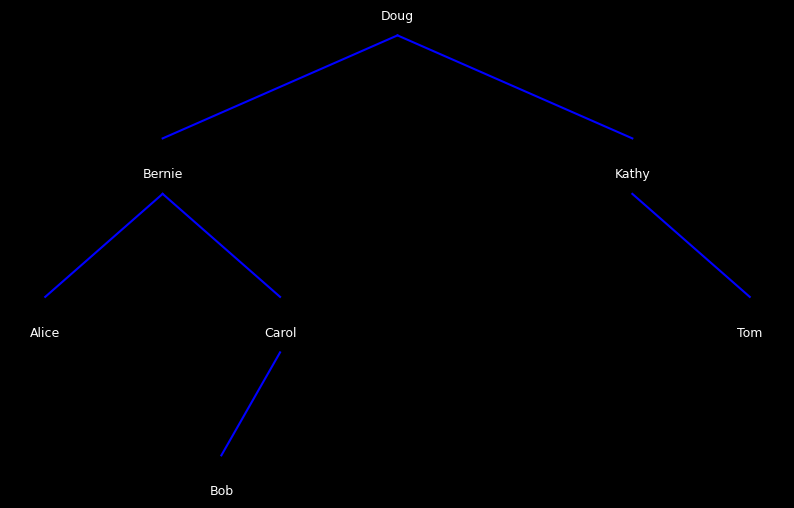

without Alice, Kathy, Carol:
['Bernie', 'Bob', 'Doug', 'Tom']


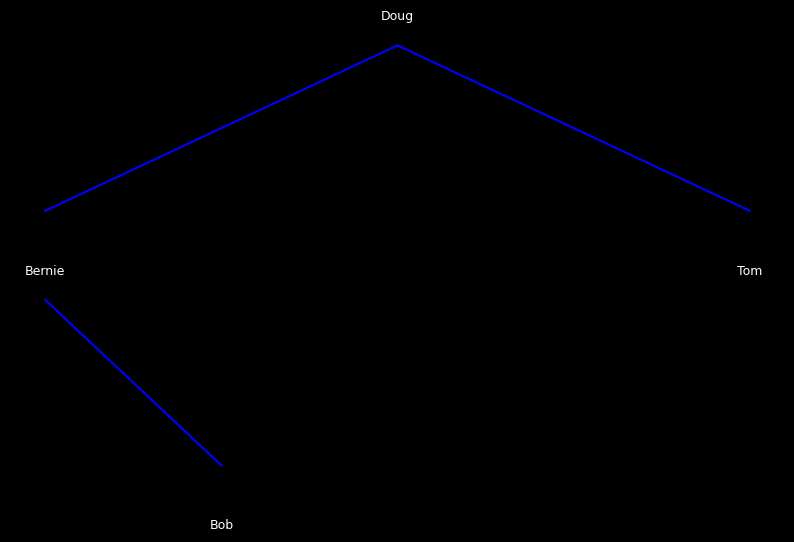

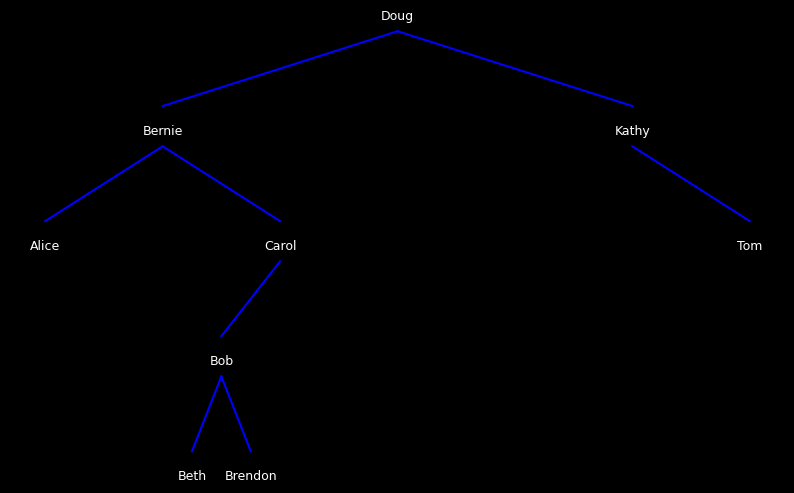

Now we remove Doug:


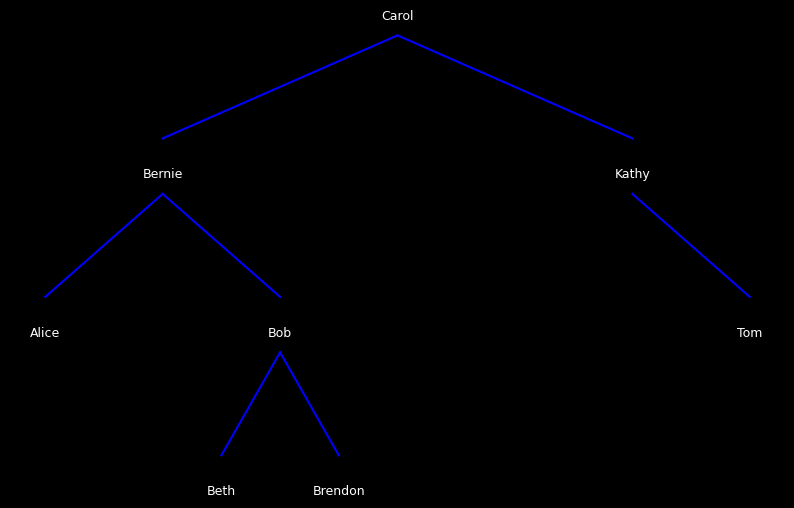

In [219]:
def make_tree():
    people3 = ['Doug','Bernie','Alice','Kathy','Tom','Carol', 'Bob']
    bst = BST()
    for p in people3:
        bst.insert(p)
    return bst

bst3 = make_tree()

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)

# no child:
bst3.delete('Alice')

# only right child:
bst3.delete('Kathy')

#only left child:
bst3.delete('Carol')

# this should have worked correctly:
print ("without Alice, Kathy, Carol:")
print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)


# now test two children:
bst3 = make_tree()
bst3.insert("Brendon")
bst3.insert("Beth")
plot_tree(bst3.tree)
assert bst3.is_element('Doug') == True
print ("Now we remove Doug:")
bst3.delete('Doug')
plot_tree(bst3.tree)

# check that Doug is gone and others are still here:
assert bst3.is_element('Doug') == False
assert bst3.is_element('Bob') == True
assert bst3.is_element('Brendon') == True
assert bst3.is_element('Beth') == True
assert bst3.is_element('Carol') == True
assert bst3.is_element('Frank') == False


## Question 3
What is the typical depth of a tree with n random elements? For values of n between 1 and 1000, create a BST by inserting n random integers (choose random.randint(0,100000) for each value) and record the height that this BST has.
Now create a plot with n on the x axis and three lines: 1) the height you just computed, 2) the minimum height a BST with n items can have, 3) 1 + 2 times the minimum height. The last line can be shown to be a good estimate of the height of a random tree: Do you agree?

I do agree as our green line seen below is on average intersection the heights we computed in part 1 and a good estimate overall.

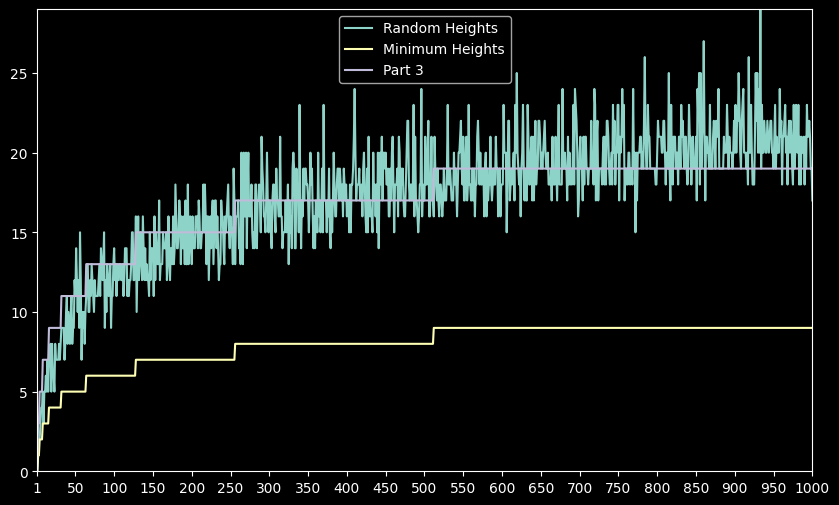

In [220]:
import random
import math
import matplotlib
import numpy as np

def make_tree(data):
    bst = BST()
    for d in data:
        bst.insert(d)
    return bst

heights = []
for i in range(1,1001):
    bst = BST()
    data = []
    for j in range(i):
        bst.insert(random.randint(0,100000))
    heights.append(bst.height())

xpoints = np.arange(1,1001,1)
min_heights = [math.floor(math.log(i,2)) for i in range(1,1001)]
part_3 = [(1 + 2 *math.floor(math.log(i,2))) for i in range(1,1001)]
ypoints = heights

plt.plot(xpoints, ypoints,label="Random Heights")
plt.plot(xpoints, min_heights,label="Minimum Heights")
plt.plot(xpoints,part_3,label="Part 3")
leg = plt.legend(loc='upper center')
ticks = np.arange(0, 1001, 50)
ticks[0] = 1
plt.xticks(ticks)
plt.margins(0)
plt.show()




## Question 4
Implement the function rotate_right(object) that performs a tree rotation of the given node Q (which you find by searching for object). This operation is used to rebalance binary search trees (to minimize the total height of the tree). The rotation performs the following operation:

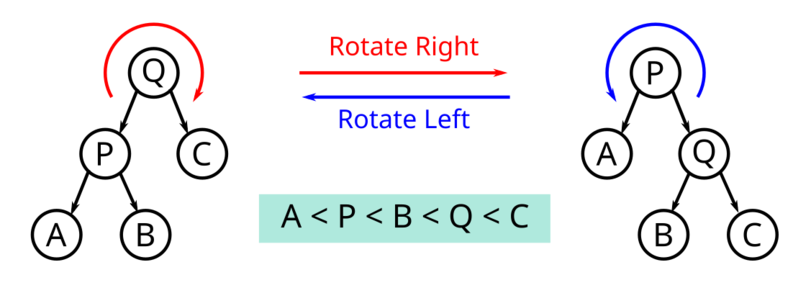 

Note that the ordering of the nodes is still correctly preserved. Finally, make sure your code works even if some children do not exist.

Then test this:

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


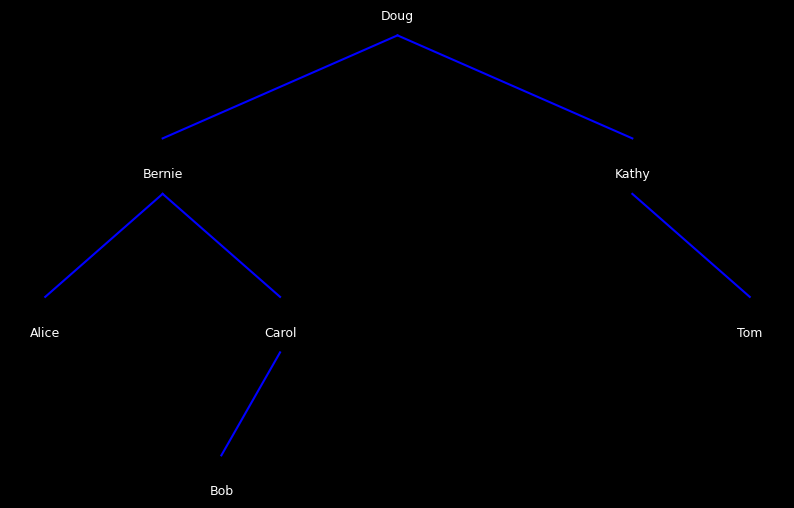

h
['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


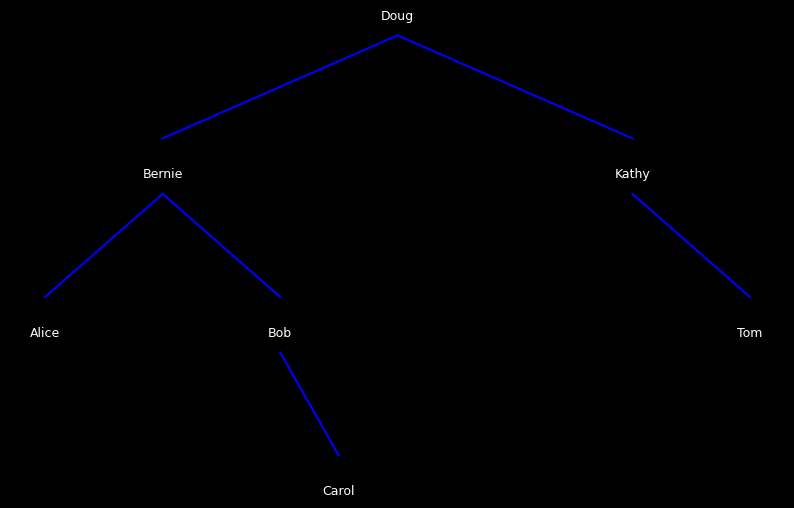

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


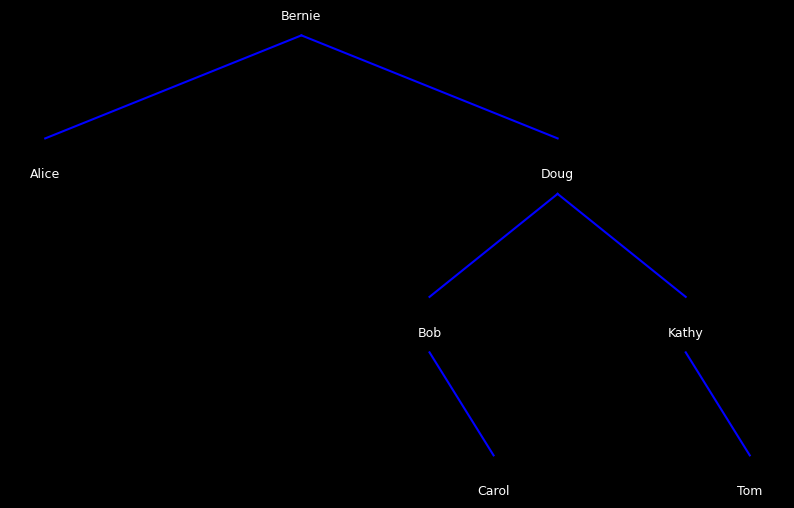

In [247]:
def make_tree():
    people3 = ['Doug','Bernie','Alice','Kathy','Tom','Carol', 'Bob']
    bst = BST()
    for p in people3:
        bst.insert(p)
    return bst

bst3 = make_tree()

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)


bst3.rotate_right("Carol")

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)


bst3.rotate_right("Doug")

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)